# Analysis of results with the simple configuration

## Setup
### Imports

In [15]:
# imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [16]:
results_path = 'results\\complex\\10000\\100_iter_results.csv'

Create the results table

In [17]:
# load the results csv file
results_df_raw = pd.read_csv(results_path)
display(results_df_raw.head())

,config_window_generator_type,config_window_size,config_population_comparer,config_threshold,config_max_distance,config_slide_by,number_of_correct_detections,number_of_true_changes,number_of_detections,precision,recall,f1_score,mean_lag,all_lags,config_event_log_file_path,compute_time
0,fixed,100,KSTestPopComparer,0.05,200,5,0,5,7,0.0,0.0,NaN,NaN,[],data\synthetic\attribute_drift\complex\10000\c...,2.815166
1,fixed,100,KSTestPopComparer,0.05,200,10,0,5,7,0.0,0.0,NaN,NaN,[],data\synthetic\attribute_drift\complex\10000\c...,1.588923
2,fixed,100,ChiSquaredComparer,0.05,200,5,0,5,0,NaN,0.0,NaN,NaN,[],data\synthetic\attribute_drift\complex\10000\c...,11.762724
3,fixed,100,ChiSquaredComparer,0.05,200,10,0,5,0,NaN,0.0,NaN,NaN,[],data\synthetic\attribute_drift\complex\10000\c...,6.207437
4,fixed,200,KSTestPopComparer,0.05,200,5,0,5,20,0.0,0.0,NaN,NaN,[],data\synthetic\attribute_drift\complex\10000\c...,4.641958


In [18]:
# drop some columns that are not needed
drop_columns = ['config_event_log_file_path', 'all_lags']
results_df = results_df_raw.drop(columns=drop_columns)

# rename existing columns
results_df.columns= ['window generator', 'window size',
       'population comparer', 'threshold', 'max distance',
       'slide by', 'number of correct detections',
       'number of true changes', 'number of detections', 'precision', 'recall',
       'f1 score', 'lag', 'compute time']

# define the configuration columns to group results on 
config_columns = ['window generator', 'window size',
       'population comparer', 'threshold', 'max distance',
       'slide by']

# rename population comparers 
name_mapping = {
       'ChiSquaredComparer': 'Chi Squared',
       'HellingerDistanceComparer': 'Hellinger Dist.',
       'KSTestPopComparer': 'KS test'
}
results_df['population comparer'] = pd.Series([name_mapping[comparer] for comparer in results_df['population comparer']])

results_df = results_df.groupby(by=config_columns).agg({
    'number of correct detections': ['sum'],
    'number of true changes': ['sum'],
    'number of detections': ['sum'],
    'precision': ['mean'],
    'recall': ['mean'],
    'f1 score': ['mean'],
    'lag': ['mean'],
    'compute time': ['mean']
})

results_df = results_df.reset_index()

# recalculate precision, recall and f1
results_df[('precision', 'true')] = results_df['number of correct detections'] / results_df['number of detections']
results_df[('recall', 'true')] = results_df['number of correct detections'] / results_df['number of true changes']
results_df[('f1 score', 'true')] = 2 / (1/results_df[('precision', 'true')] + 1/results_df[('recall', 'true')])

results_df

,window generator,window size,population comparer,threshold,max distance,slide by,number of correct detections,number of true changes,number of detections,precision,recall,f1 score,lag,compute time,precision,recall,f1 score
,,,,,,,sum,sum,sum,mean,mean,mean,mean,mean,true,true,true
0,adaptive,100,Chi Squared,0.05,200,5,0,500,0,NaN,0.000,NaN,NaN,11.453062,NaN,0.000,NaN
1,adaptive,100,Chi Squared,0.05,200,10,0,500,0,NaN,0.000,NaN,NaN,6.040818,NaN,0.000,NaN
2,adaptive,100,KS test,0.05,200,5,227,500,1539,0.146718,0.454,0.299475,20.228311,2.529868,0.147498,0.454,0.222658
3,adaptive,100,KS test,0.05,200,10,200,500,797,0.233419,0.400,0.436428,20.893939,1.481903,0.250941,0.400,0.308404
4,adaptive,200,Chi Squared,0.05,200,5,0,500,0,NaN,0.000,NaN,NaN,16.512779,NaN,0.000,NaN
5,adaptive,200,Chi Squared,0.05,200,10,0,500,0,NaN,0.000,NaN,NaN,8.599759,NaN,0.000,NaN
6,adaptive,200,KS test,0.05,200,5,288,500,1878,0.153820,0.576,0.302847,68.753165,4.939505,0.153355,0.576,0.242220
7,adaptive,200,KS test,0.05,200,10,268,500,1195,0.211572,0.536,0.408355,65.109589,2.680325,0.224268,0.536,0.316224
8,fixed,100,Chi Squared,0.05,200,5,0,500,0,NaN,0.000,NaN,NaN,11.709542,NaN,0.000,NaN


In [19]:
# simplify by deleting non-interesting columns and getting rid of multiindex
drop_columns = [('precision', 'mean'), ('recall', 'mean'), ('f1 score', 'mean'), 
                ('number of correct detections', 'sum'), ('number of true changes', 'sum'), 
                ('number of detections', 'sum')]

all_results = results_df.drop(columns=drop_columns)
all_results.columns = all_results.columns.get_level_values(0)

# reorder columns
ordered_columns = config_columns + ['precision', 'recall', 'f1 score', 'lag', 'compute time']

all_results = all_results[ordered_columns]

# also create a results df without the HellingerDistanceComparer and slide by 5 or 10
simple_results_df = all_results[all_results['population comparer']!='Hellinger Dist.']
simple_results_df = simple_results_df[simple_results_df['slide by'] <= 10]

# drop the threshold and max distance (they are always the same)
simple_results_df = simple_results_df.drop(columns=['threshold', 'max distance'])

# set the configuration columns as index
all_results = all_results.set_index(config_columns)
simple_results_df = simple_results_df.set_index(['window generator', 'window size', 'population comparer', 'slide by'])

## Analysis

### Get an overview of the simple results table
Show the table, write to Latex.

Also, produce a facet grid plot.

In [20]:
simple_results_df

precision  recall  \
window generator window size population comparer slide by                      
adaptive         100         Chi Squared         5               NaN   0.000   
                                                 10              NaN   0.000   
                             KS test             5          0.147498   0.454   
                                                 10         0.250941   0.400   
                 200         Chi Squared         5               NaN   0.000   
                                                 10              NaN   0.000   
                             KS test             5          0.153355   0.576   
                                                 10         0.224268   0.536   
fixed            100         Chi Squared         5               NaN   0.000   
                                                 10              NaN   0.000   
                             KS test             5          0.159581   0.488   
                                                 10         0.279452   0.408   
                 200         Chi Squared         5               NaN   0.000   
                                                 10              NaN   0.000   
                             KS test             5          0.143002   0.566   
                                                 10         0.228176   0.528   

                                                           f1 score  \
window generator window size population comparer slide by             
adaptive         100         Chi Squared         5              NaN   
                                                 10             NaN   
                             KS test             5         0.222658   
                                                 10        0.308404   
                 200         Chi Squared         5              NaN   
                                                 10             NaN   
                             KS test             5         0.242220   
                                                 10        0.316224   
fixed            100         Chi Squared         5              NaN   
                                                 10             NaN   
                             KS test             5         0.240513   
                                                 10        0.331707   
                 200         Chi Squared         5              NaN   
                                                 10             NaN   
                             KS test             5         0.228318   
                                                 10        0.318648   

                                                                 lag  \
window generator window size population comparer slide by              
adaptive         100         Chi Squared         5               NaN   
                                                 10              NaN   
                             KS test             5         20.228311   
                                                 10        20.893939   
                 200         Chi Squared         5               NaN   
                                                 10              NaN   
                             KS test             5         68.753165   
                                                 10        65.109589   
fixed            100         Chi Squared         5               NaN   
                                                 10              NaN   
                             KS test             5         26.387821   
                                                 10        18.572139   
                 200         Chi Squared         5               NaN   
                                                 10              NaN   
                             KS test             5         77.853632   
                                                 10        64.671498   

                                          

In [21]:
# write simple results to latex for results table
path = 'results/latex/complex_results_table.tex'
with open(path, 'w') as file:
    simple_results_df.to_latex(file, float_format="%.2f", caption='Results with Complex Configuration', label='tab:results_complex')

C:\Users\Lennart\AppData\Local\Temp\ipykernel_25248\1137877148.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  simple_results_df.to_latex(file, float_format="%.2f", caption='Results with Complex Configuration', label='tab:results_complex')


In [22]:
# get a generatl statistic across all configurations
general_stats = simple_results_df.describe()

general_stats = general_stats.loc[['mean', 'std', 'min', 'max']]

display(general_stats)

# write general stats to latex
path = 'results/latex/complex_general_stats.tex'
with open(path, 'w') as file:
    general_stats.to_latex(file, float_format="%.2f", caption='Aggregated results with Complex Configuration', label='tab:results_complex_agg')

,precision,recall,f1 score,lag,compute time
mean,0.198284,0.247250,0.276087,45.308762,6.784699
std,0.053561,0.259591,0.046460,25.839501,5.049393
min,0.143002,0.000000,0.222658,18.572139,1.427759
max,0.279452,0.576000,0.331707,77.853632,16.676025


C:\Users\Lennart\AppData\Local\Temp\ipykernel_25248\2304184166.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  general_stats.to_latex(file, float_format="%.2f", caption='Aggregated results with Complex Configuration', label='tab:results_complex_agg')


In [50]:
# compare the results of the simple and complex configuration
path_simple_results_csv = 'results/csv/simple_general_stats.csv'
simple_general_stats = pd.read_csv(path_simple_results_csv, index_col=0)
simple_results_mean = simple_general_stats.loc['mean']
complex_results_mean = general_stats.loc['mean']

combined_stats_df = pd.DataFrame({'Simple Config.': simple_results_mean, 'Complex Config.': complex_results_mean})
combined_stats_df

# to latex
path = 'results/latex/results_comparison_simple_complex.tex'
with open(path, 'w') as file:
    combined_stats_df.to_latex(file, float_format="%.2f", caption='Mean Results with Simple and Complex Configuration', label='tab:results_comparison_simple_complex')


C:\Users\Lennart\AppData\Local\Temp\ipykernel_25248\1918058899.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  combined_stats_df.to_latex(file, float_format="%.2f", caption='Mean Results with Simple and Complex Configuration', label='tab:results_comparison_simple_complex')


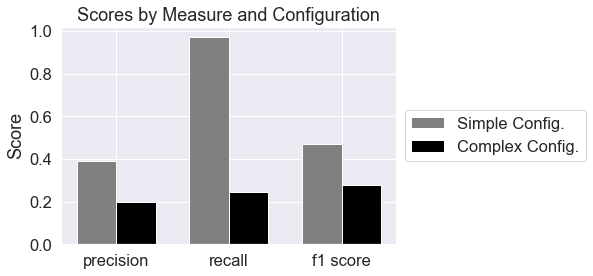

In [47]:
labels = ['precision', 'recall', 'f1 score'] # or simple_general_stats.columns
simple_means = simple_results_mean[['precision', 'recall', 'f1 score']]
complex_means = complex_results_mean[['precision', 'recall', 'f1 score']]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, simple_means, width, label='Simple Config.', color='grey')
rects2 = ax.bar(x + width/2, complex_means, width, label='Complex Config.', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores by Measure and Configuration')
ax.set_xticks(x, labels)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor='white')

plt.show()

In [23]:
# Get the result with the highest f1 score
df = simple_results_df.reset_index()
df.sort_values('f1 score', ascending=False)[:1]

,window generator,window size,population comparer,slide by,precision,recall,f1 score,lag,compute time
11,fixed,100,KS test,10,0.279452,0.408,0.331707,18.572139,1.427759


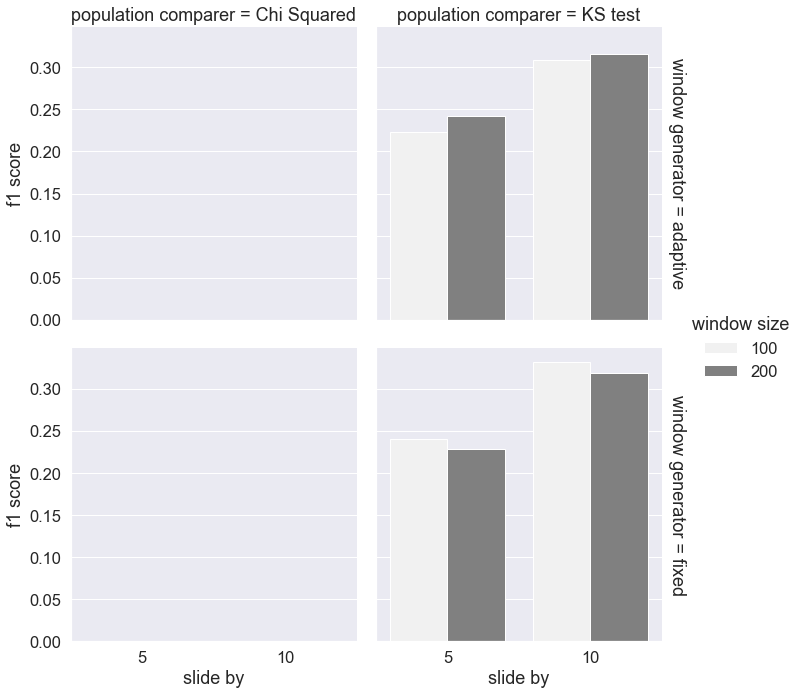

In [24]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="slide by", y="f1 score",
                hue="window size", col="population comparer",
                row="window generator",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [25]:
# create an additional table that shows the result with different window generators 
# as the difference is hard to tell from the table
df.groupby(['window generator']).mean()['f1 score']

window generator
adaptive    0.272377
fixed       0.279796
Name: f1 score, dtype: float64

- Chi Squared did not detect any change points any more, therefore, precision, recall and f1 scores where null (devision by 0)
- KS test achieved f1 scores between 0.22 and 0.33
- Doubling the window size did not increase the f1 score which is surprising because the difference in windows should be come more robust
- Only increasing the "slide by" setting from 5 to 10 had a positive impact

### Lag

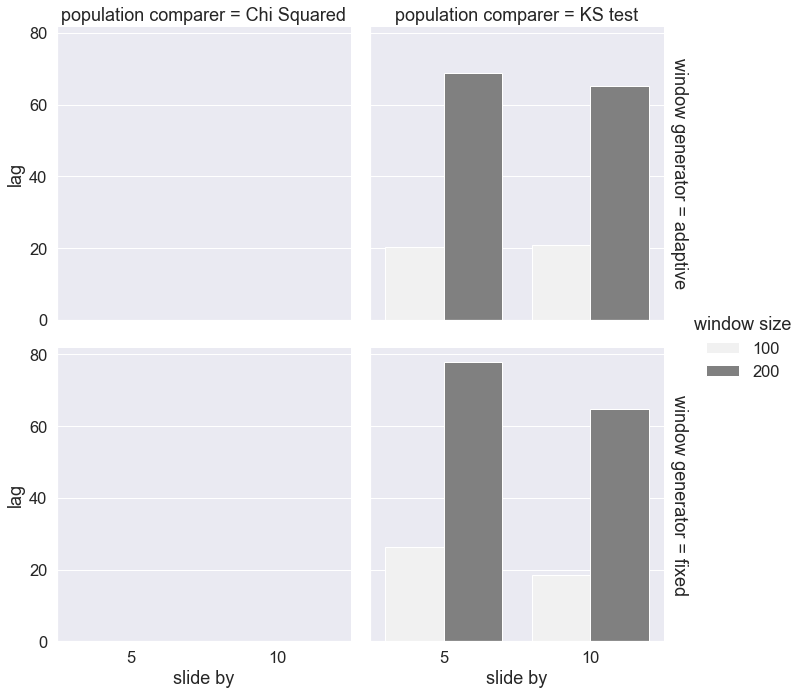

In [52]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="slide by", y="lag",
                hue="window size", col="population comparer",
                row="window generator",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [53]:
# create an additional table that shows the result with different window generators 
# as the difference is hard to tell from the table
df.groupby(['window generator']).mean()['lag']

window generator
adaptive    43.746251
fixed       46.871272
Name: lag, dtype: float64

### Compute Time


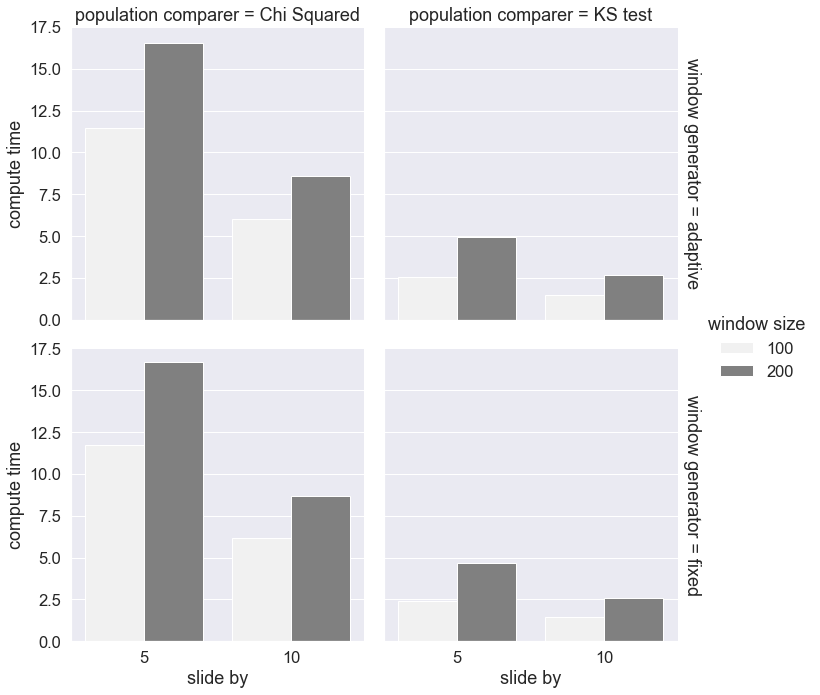

In [54]:
df = simple_results_df.reset_index()
sns.set(font_scale = 1.5)
plot = sns.catplot(data=df, x="slide by", y="compute time",
                hue="window size", col="population comparer",
                row="window generator",
                kind="bar",
                margin_titles=True,
                color='grey'
                )
plot

In [55]:
f"Compute times where between {min(df['compute time']):.2f} and {max(df['compute time']):.2f} seconds."

'Compute times where between 1.43 and 16.68 seconds.'